# Regression

## Create Data Frames

### DF Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df = pd.DataFrame({'gender': np.random.binomial(1, 0.55, 1000),
                   'height': np.random.normal(0, 10, 1000),
                   'noise': np.random.normal(0, 8, 1000)})
df.head(10)

,gender,height,noise
0,0,-25.194104,-1.740717
1,0,-13.283625,-8.685398
2,0,15.403155,9.568475
3,1,-7.576876,7.131582
4,0,-4.328778,-8.360530
5,0,-2.543073,-6.646184
6,1,26.021895,2.354101
7,1,12.396420,-2.030773
8,0,11.026785,-5.993320
9,1,0.418195,-6.311619


In [79]:
df['height'] = df['height'] + df['gender'].apply(lambda x: 160 if x else 180)
df['weight'] = df['height'] + df['noise'] -110
df.drop('noise', axis=1, inplace=True)

In [80]:
df['height_with75nan'] = df['height'].apply(lambda x: x if np.random.binomial(1, 0.25) else np.nan)
df['height_with10nan'] = df['height'].apply(lambda x: x if np.random.binomial(1, 0.9) else np.nan)

In [81]:
df

,gender,height,weight,height_with75nan,height_with10nan
0,0,154.805896,43.065179,NaN,154.805896
1,0,166.716375,48.030977,NaN,166.716375
2,0,195.403155,94.971630,NaN,195.403155
3,1,152.423124,49.554707,NaN,152.423124
4,0,175.671222,57.310692,175.671222,175.671222
...,...,...,...,...,...
995,1,149.698580,45.847536,NaN,149.698580
996,0,172.033391,62.587872,NaN,172.033391
997,0,171.884061,46.189996,NaN,171.884061
998,0,153.671019,51.275972,153.671019,153.671019


In [82]:
df.isna().mean()

gender              0.000
height              0.000
weight              0.000
height_with75nan    0.764
height_with10nan    0.087
dtype: float64

In [83]:
df['height'].describe(percentiles=[.9, .95, .99])

count    1000.000000
mean      169.242467
std        13.715277
min       129.553664
50%       169.187750
90%       187.233651
95%       191.080525
99%       200.464703
max       206.323627
Name: height, dtype: float64

C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_11208\971491414.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


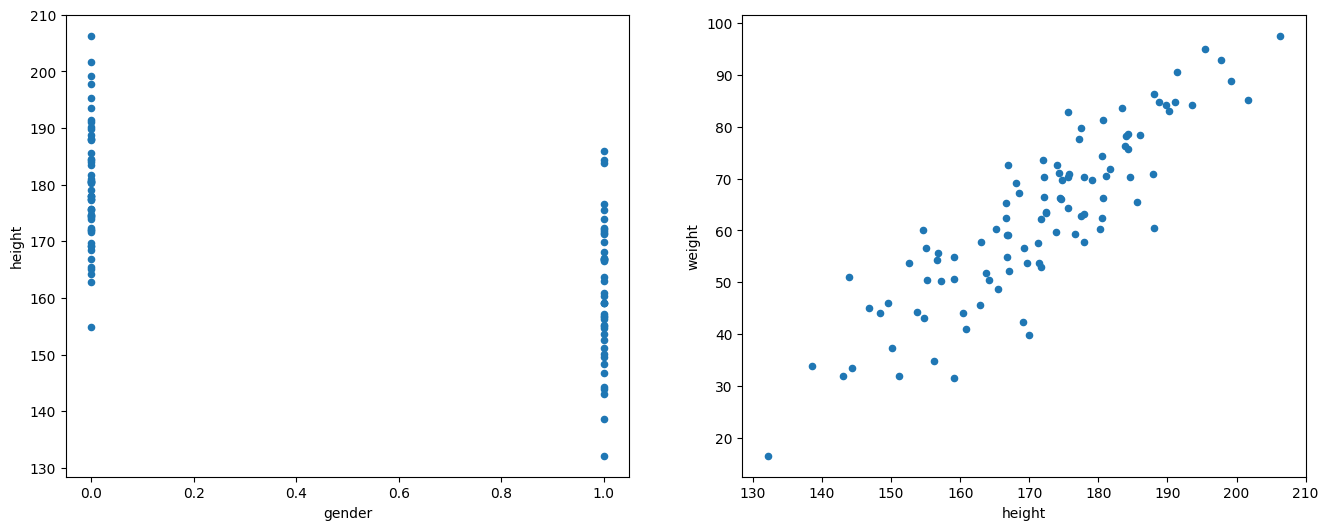

In [84]:
df_plot = df.sample(100)
fig, ax = plt.subplots(1,2, figsize=(16, 6))
df_plot.plot(kind='scatter', x='gender', y='height', ax=ax[0])
df_plot.plot(kind='scatter', x='height', y='weight', ax=ax[1])
fig.show()

### DF Anscombe

In [95]:
df_anscombe = pd.DataFrame(
    [[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
     [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
     [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
     [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]]
).T

df_anscombe.columns = ['x', 'y1', 'y2', 'y3']
df_anscombe

,x,y1,y2,y3
0,10.0,8.04,9.14,7.46
1,8.0,6.95,8.14,6.77
2,13.0,7.58,8.74,12.74
3,9.0,8.81,8.77,7.11
4,11.0,8.33,9.26,7.81
5,14.0,9.96,8.10,8.84
6,6.0,7.24,6.13,6.08
7,4.0,4.26,3.10,5.39
8,12.0,10.84,9.13,8.15
9,7.0,4.82,7.26,6.42


C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_11208\229155848.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


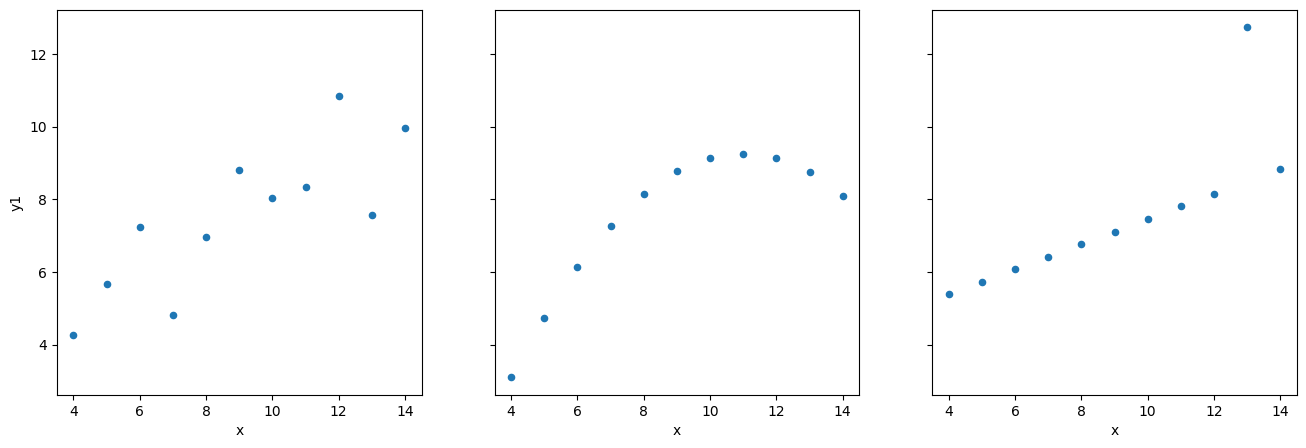

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

for i in range(3):

    df_anscombe.plot(
        kind='scatter', x='x', y=f'y{i+1}', ax=axs[i]
    )
    
fig.show()

### DF Polynomial

In [8]:
np.random.seed(42)
x = np.arange(0, 1000) / 100 -5
y = (2 + 0.5 * x + 0.1 * x**2 + x**3) + np.random.normal(0,12,1000)

In [9]:
df_poly = pd.DataFrame({'x':x, 'y':y})

<Axes: xlabel='x', ylabel='y'>

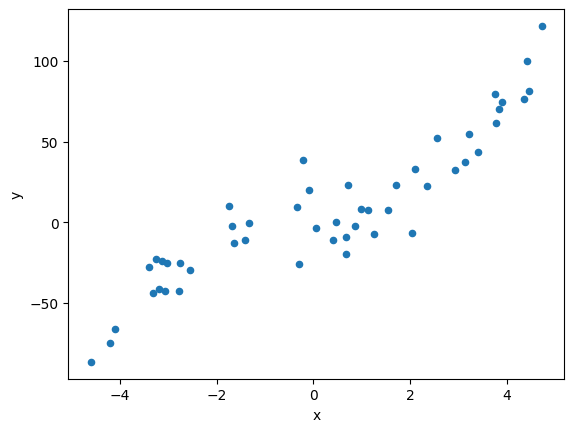

In [10]:
df_poly.sample(50).plot(kind='scatter', x='x', y='y')

### DF Boston

Boston house prices dataset

Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
...

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.


In [7]:
df_boston = pd.read_csv('./data/boston.csv', index_col=False)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Regressions

### Linear Regression with df (linear regression)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score


In [87]:
reg = LinearRegression()
# reg.fit(x,y): x is a matrix since we can use more thand one feature
#reg.fit(df['height'].values.reshape(-1, 1), df['weight'])
reg.fit(df[['height']], df['weight'])

LinearRegression()

In [88]:
print('Weight = {:.2f} + Height * {:.2f}'.format(reg.intercept_, reg.coef_[0]))


Weight = -107.04 + Height * 0.98


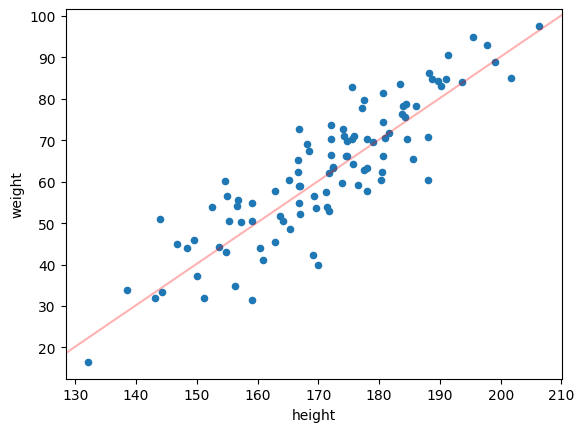

In [89]:
df_plot.plot(kind='scatter', x='height', y='weight')
# Two possibilities how to draw the regression line: first old version, second from matplot version 3.3
# plt.plot([140, 200], [-109.82+140*1, -109.82+200*1], color='red', alpha=0.3)
plt.axline([140, -109.82+140*1], [200, -109.82+200*1], color='red', alpha=0.3)

### Regression Anscombe

R2: 0.67, MSE: 1.25, MAE: 0.84,  MdAE: 0.74   @ target=y1
R2: 0.67, MSE: 1.25, MAE: 0.97,  MdAE: 0.76   @ target=y2
R2: 0.67, MSE: 1.25, MAE: 0.72,  MdAE: 0.39   @ target=y3


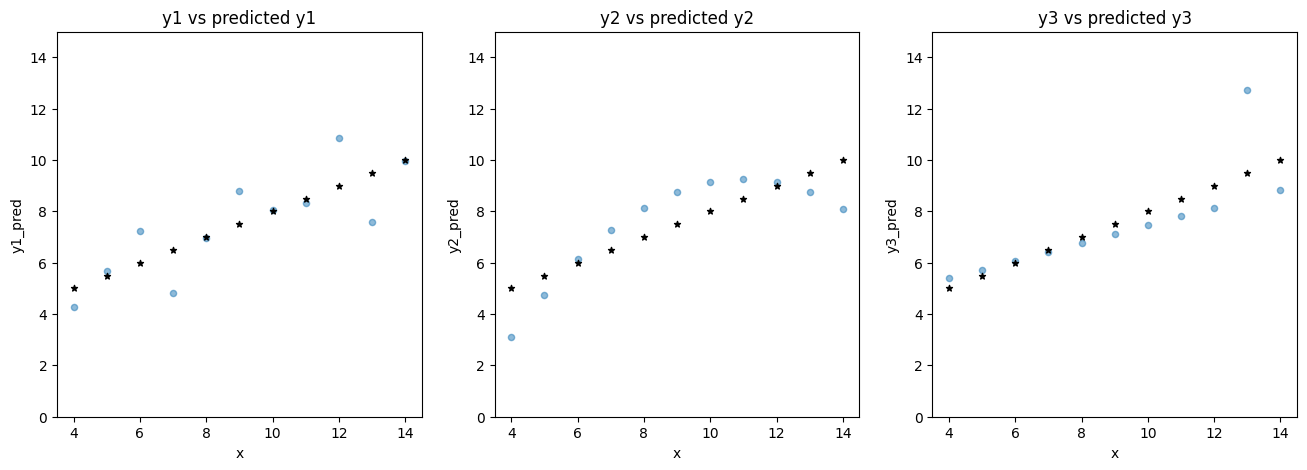

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=False)

for i, target in enumerate(['y1', 'y2', 'y3']):

    reg = LinearRegression()
    reg.fit(df_anscombe[['x']], df_anscombe[target])
    df_anscombe[f'{target}_pred'] = reg.predict(df_anscombe[['x']])
    
    df_anscombe.plot(
        title=f'{target} vs predicted {target}', kind='scatter', x='x', y=target, ax=axs[i], marker='o', ylim=(0,15), alpha=0.5
    )
    
    # df_anscombe.set_index('x')[f'{target}_pred'].plot(kind='line', ax=axs[i], color='r')
    df_anscombe.plot(
        kind='scatter', x='x', y=f'{target}_pred', ax=axs[i], marker='*', color='k'
    )

    
    print(
        'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f},  MdAE: {:.2f}   @ target={}'.format(
            r2_score(df_anscombe[target], df_anscombe[f'{target}_pred']),
            mean_squared_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            mean_absolute_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            median_absolute_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            target
        )
    )

MSE: 1.31, MAE: 1.01 @ target=y1
MSE: 0.72, MAE: 0.68 @ target=y2
MSE: 1.34, MAE: 0.98 @ target=y3


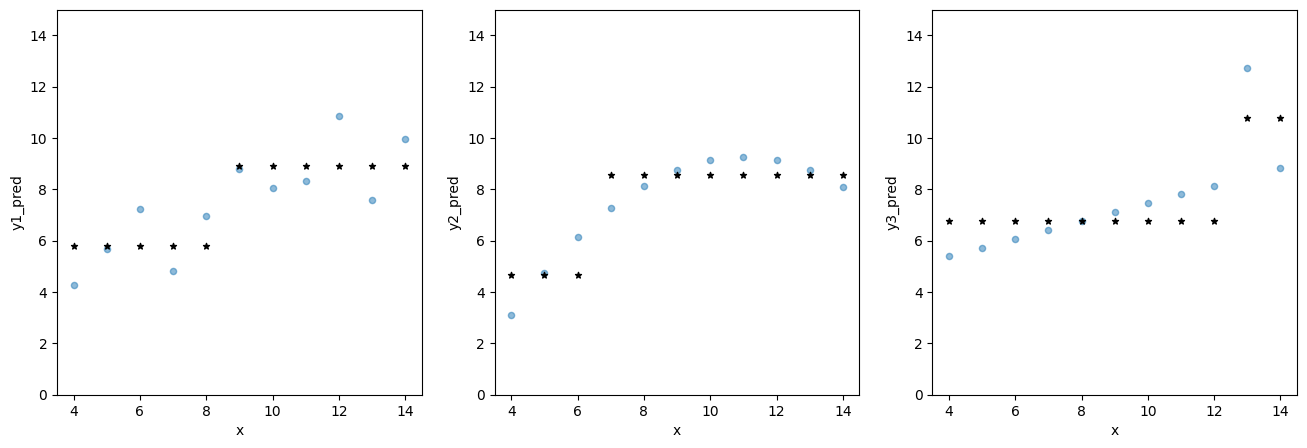

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error, mean_absolute_error

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=False)

for i, target in enumerate(['y1', 'y2', 'y3']):

    reg = DecisionTreeRegressor(max_depth=1)
    reg.fit(df_anscombe[['x']], df_anscombe[target])
    df_anscombe[f'{target}_pred'] = reg.predict(df_anscombe[['x']])
    
    df_anscombe.plot(
        kind='scatter', x='x', y=target, ax=axs[i], marker='o', ylim=(0,15), alpha=0.5
    )
    
    # df_anscombe.set_index('x')[f'{target}_pred'].plot(kind='line', ax=axs[i], color='r')
    df_anscombe.plot(
        kind='scatter', x='x', y=f'{target}_pred', ax=axs[i], marker='*', color='k'
    )
    
    print(
        'MSE: {:.2f}, MAE: {:.2f} @ target={}'.format(
            mean_squared_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            mean_absolute_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            target
        )
    )

### Polynomial Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [12]:
reg = LinearRegression()
reg.fit(df_poly[['x']], df_poly['y'])

LinearRegression()

In [13]:
print('intercept: ', reg.intercept_, '\nslope: ', reg.coef_[0] )

intercept:  3.016036695565358 
slope:  15.64340513949006


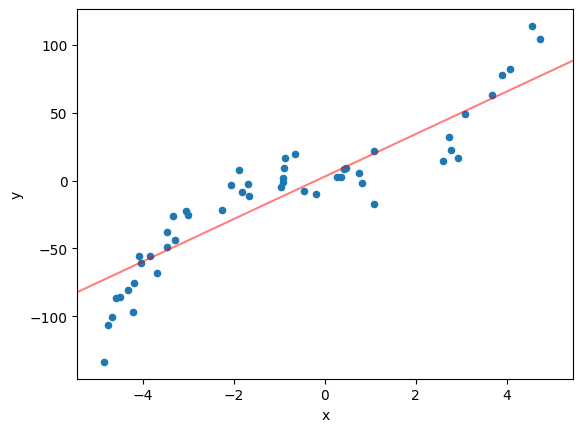

In [14]:
min_poly = df_poly.sample(50)['x'].min()
max_poly = df_poly.sample(50)['x'].max()


df_poly.sample(50).plot(kind='scatter', x='x', y='y')
plt.axline((min_poly, 3.01 + min_poly * 15.64), (max_poly, 3.01 + max_poly * 15.64), color='red', alpha=0.5)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
df_poly_processed = poly.fit_transform(df_poly[['x']])


In [18]:
from sklearn.linear_model import LinearRegression

reg_poly = LinearRegression(fit_intercept=False)
reg_poly.fit(df_poly_processed,  df_poly['y'])

LinearRegression(fit_intercept=False)

In [21]:
reg_poly.coef_

array([2.09419397, 0.39214426, 0.11672252, 1.01682583])

In [23]:
df_poly.head()

,x,y
0,-5.00,-117.039430
1,-4.99,-123.915661
2,-4.98,-113.743690
3,-4.97,-102.502025
4,-4.96,-122.853616


In [26]:
df_poly['y_hat'] = 2.09 + 0.39 * df_poly['x'] + 0.1 * df_poly['x']**2 + df_poly['x']**3

In [27]:
df_poly.head()

,x,y,y_hat
0,-5.00,-117.039430,-122.360000
1,-4.99,-123.915661,-121.617589
2,-4.98,-113.743690,-120.878152
3,-4.97,-102.502025,-120.141683
4,-4.96,-122.853616,-119.408176


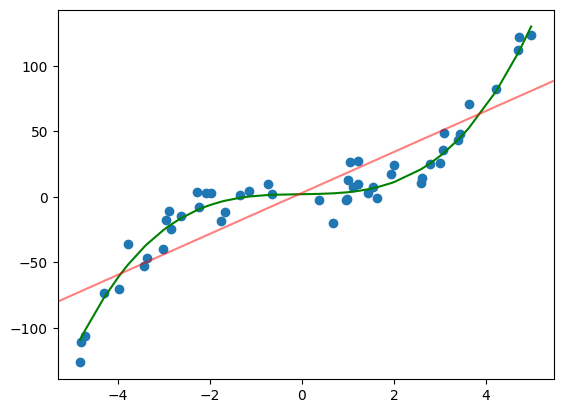

In [42]:
min_poly = df_poly.sample(50)['x'].min()
max_poly = df_poly.sample(50)['x'].max()


df_poly_sample = df_poly.sample(50).sort_values('x',ascending=True)
plt.scatter(df_poly_sample['x'],df_poly_sample['y'])
plt.plot(df_poly_sample['x'],df_poly_sample['y_hat'], color='green')
plt.axline((min_poly, 3.01 + min_poly * 15.64), (max_poly, 3.01 + max_poly * 15.64), color='red', alpha=0.5)
plt.show()